In [0]:
# !pip3 install torch torchvision

In [0]:
#1 Loading dataset

In [0]:
import torch
import torch.nn as nn
from torchvision.transforms import transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [9]:
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

Processing...
Done!


In [10]:
len(train_dataset)

60000

In [13]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [0]:
# Displaying MNIST

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [0]:
show_img = train_dataset[0][0].numpy().reshape(28,28)

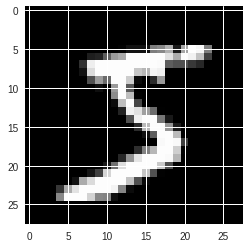

In [17]:
plt.imshow(show_img, cmap='gray')

In [18]:
train_dataset[0][1]

tensor(5)

In [0]:
# Loading the test dataset

In [0]:
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [23]:
len(test_dataset)

10000

In [0]:
# Making dataset iterable
# total data = 60k
# minibatch = 100
# iterations = 300 # one minibatch forward and backward pass
# epoch means running through the whole dataset
# epochs = 3000 / (60000/100) = 5

In [26]:
batch_size = 100
n_iters = 3000
num_epochs = int(n_iters / (len(train_dataset)/batch_size))
num_epochs

5

In [0]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [28]:
# check iterability
import collections
isinstance(train_loader, collections.Iterable)

True

In [0]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [30]:
isinstance(test_loader, collections.Iterable)

True

In [0]:
#3 Building Model

In [0]:
class LogisticR(nn.Module):
  def __init__(self, imput_dim, output_dim):
    super(LogisticR, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)
    
  def forward(self, x):
    out = self.linear(x)
    return out

In [0]:
input_dim = 28*28
output_dim = 10

model = LogisticR(input_dim, output_dim)

In [0]:
criterion = nn.CrossEntropyLoss()
# computes softmax n cross entropy function

In [0]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [37]:
print(model.parameters())

<generator object Module.parameters at 0x7f9d2a8a55c8>


In [48]:
print(len(list(model.parameters())))

2


In [53]:
print(list(model.parameters())[0].size())
# weights

torch.Size([10, 784])


In [55]:
print(list(model.parameters())[1].size())
# bias

torch.Size([10])


In [0]:
#7 Train model

In [0]:
# convert input labels to variables
# clear gradient buffers
# get output given inputs
# get loss
# get gradients
# update parameters
# repeat

In [65]:
iter = 0
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    
    
    images = Variable(images.view(-1, 28*28))
    labels = Variable(labels)
    
    optimizer.zero_grad()
    
    outputs = model(images)
    
    loss = criterion(outputs, labels)
    
    loss.backward()
    
    optimizer.step()
    
    iter += 1
    
    if iter % 500 == 0:
      correct = 0
      total = 0
      
      for images, labels in test_loader:
        
        images = Variable(images.view(-1,28*28))
        
        outputs = model(images)
        
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        
        correct += (predicted == labels).sum().item()
        
      accuracy = 100 * correct / total
      
      print('Iteration: {}, Loss: {}, Accuracy:{}'.format(iter, loss.data[0], accuracy))
    
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Iteration: 500, Loss: 1.0166338682174683, Accuracy:82.84
Iteration: 1000, Loss: 0.9184667468070984, Accuracy:83.41
Iteration: 1500, Loss: 0.8991702198982239, Accuracy:84.05
Iteration: 2000, Loss: 0.7080260515213013, Accuracy:84.55
Iteration: 2500, Loss: 0.6490063667297363, Accuracy:85.07
Iteration: 3000, Loss: 0.6478734016418457, Accuracy:85.39


In [0]:
# saving model
torch.save(model.state_dict(), "mnist_logistic.pkl")

In [68]:
!ls

data  mnist_logistic.pkl  mnist_logitic.pkl  sample_data


In [0]:
# GPU Implementation